In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# uładnianie wykresu
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Wczytanie danych
datapath = Path() / "data" / "housing"
housing = pd.read_csv(datapath / "housing.csv")

In [2]:
# podgląd danych
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


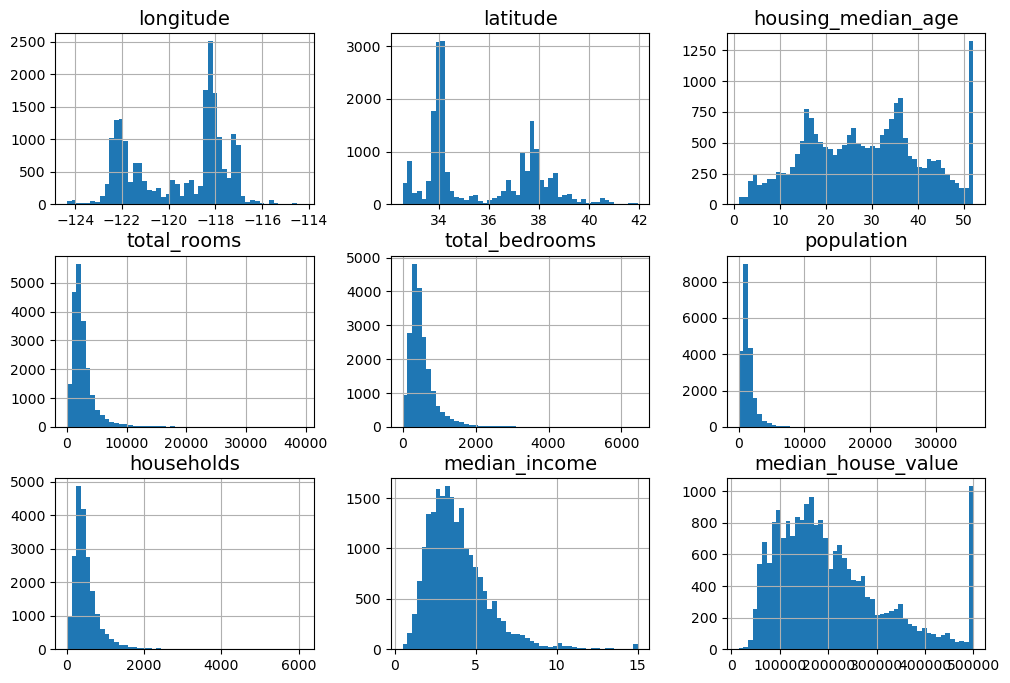

In [7]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

# te piki w ostatniej kategorii znaczą, że w danych jak coś było np. powyżej 50 lat, zawsze było wrzucone do jednej kategorii
# te median income to są jakoś przeskalowane, kto wie jak i też kto wie czy to na mieszkańca czy na gospodarstwo domowe czy na całe hrabstwo czy co

In [8]:
# dzielimy na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

# dzielimy zbiór na warstwy (strata) wg median income, i losujemy z każdego z tych podzbiorów, żeby to było lepiej reprezentatywne
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

In [9]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

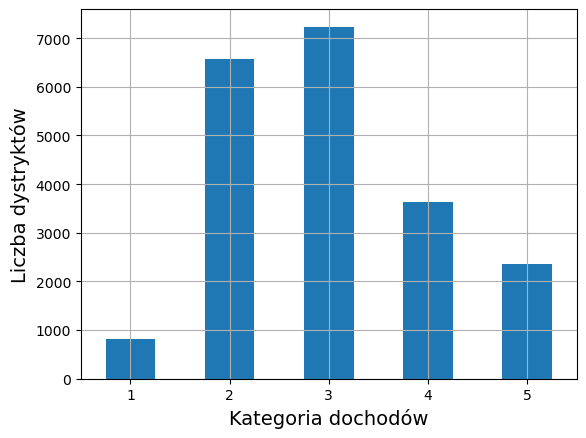

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(
    rot=0,
    grid=True
)

plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [11]:
# dzielenie całkowicie losowe
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
)

# dzielenie wg tych podkategorii
df_train, df_test = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

In [12]:
# Sprawdzamy, jak się te losowania różnią

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp)
}).sort_index()

compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe (%)"] = (compare_samp["Warstwowe (%)"] / compare_samp["Łącznie (%)"] - 1)
compare_samp["Błąd - losowe (%)"] = (compare_samp["Losowe (%)"] / compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)

,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe (%),Błąd - losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [13]:
# wyrzucamy tę kolumnę income cat
for set_ in(df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
# robimy kopię danych
df_train_eda = df_train.copy()

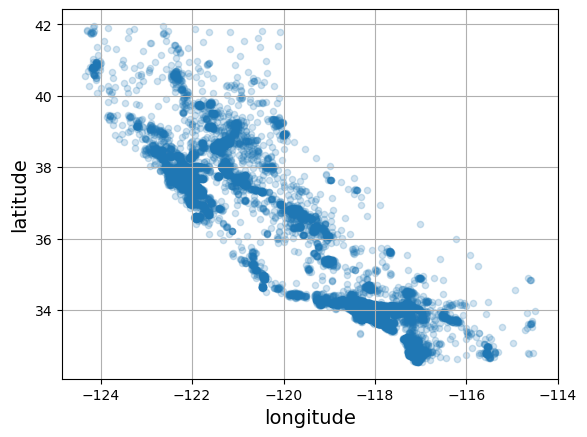

In [15]:
# robimy mapę
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

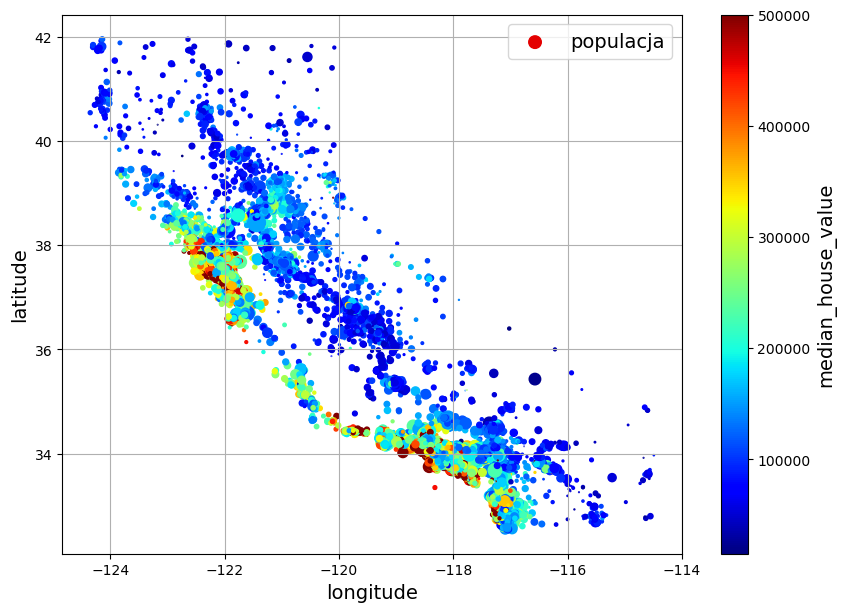

In [16]:
# dodajemy populację i cenę nieruchomości do mapy
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                  s=df_train_eda["population"] / 100, label="populacja",
                  c="median_house_value", cmap="jet", colorbar=True,
                  legend=True, figsize=(10,7))
plt.show()

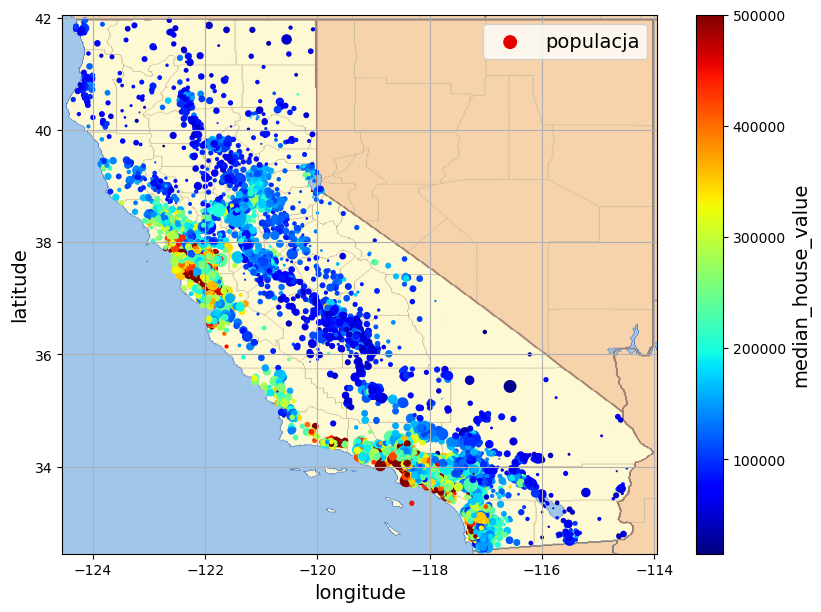

In [17]:
# dodajemy mapę kalifornii
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                  s=df_train_eda["population"] / 100, label="populacja",
                  c="median_house_value", cmap="jet", colorbar=True,
                  legend=True, figsize=(10,7))
california_img = plt.imread(datapath   / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [18]:
# korelacje między zmiennymi
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

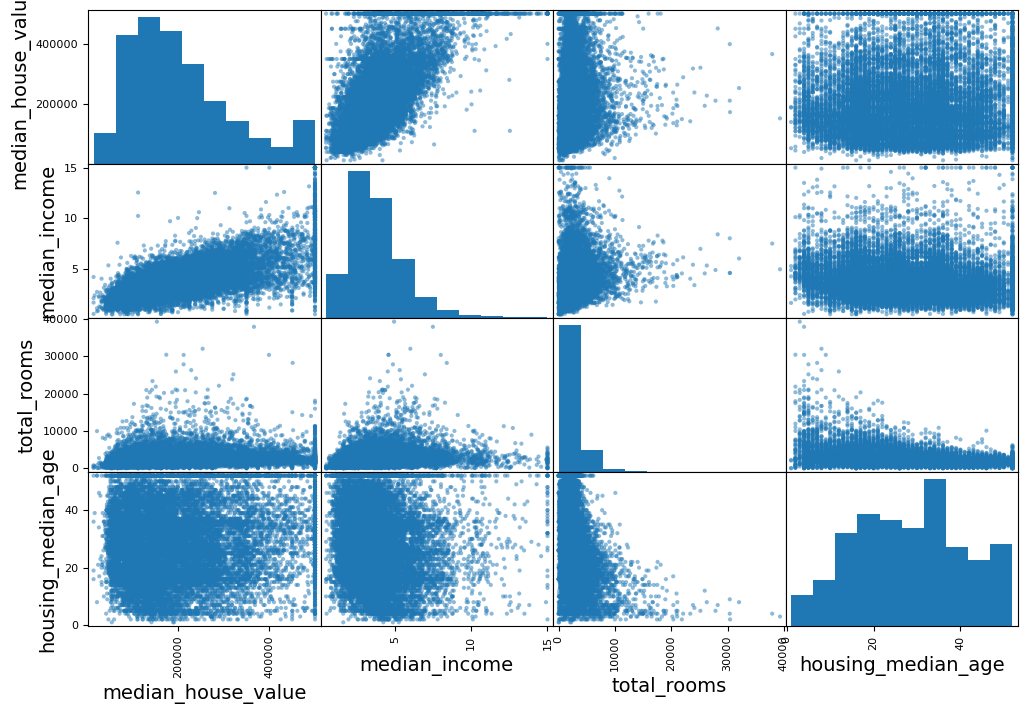

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12, 8))
plt.show()

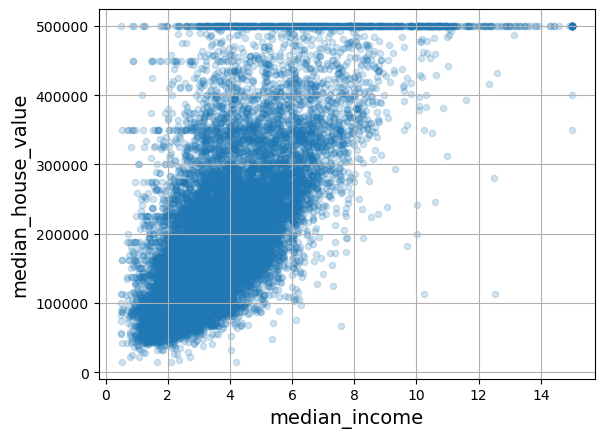

In [21]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2, grid=True)
plt.show()

# Te linie 500 000, 450 000, 350 000  itp. pokazują, że tam była jakaś agregacja. Trochę byśmy woleli, jakby nasz model nie powtarzał czegoś takiego

In [22]:
# dodajemy własne zmienne, które może dadzą nam lepsze informacje

df_train_eda["rooms_per_hausehold"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["bedroom_index"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["people_per_household"] = df_train_eda["population"] / df_train_eda["households"]

In [23]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_hausehold     0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
people_per_household   -0.038224
longitude              -0.050859
latitude               -0.139584
bedroom_index          -0.256397
Name: median_house_value, dtype: float64

In [24]:
# dzielimy zbiór na features i etykiety
x_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [25]:
# oczyszczanie danych
# jakie mamy puste dane
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
# data imputation - uzupełnianie pustych danych

null_rows_idx = x_train.isnull().any(axis=1) # zapamiętujemy te puste wiersze
x_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [27]:
# rozwiązanie 1: usuwamy wiersze z brakującymi danymi

x_train_option1 = x_train.copy()

x_train_option1.dropna(subset=["total_bedrooms"], inplace=True)

x_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [28]:
# rozwiązanie 2: usuwamy całą kolumnę

x_train_option2 = x_train.copy()

x_train_option2.drop("total_bedrooms", axis=1, inplace=True)

x_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [29]:
# rozwiązanie 3: imputujemy dane - w tym wypadku wypełniamy je medianą

x_train_option3 = x_train.copy()

median = x_train_option3["total_bedrooms"].median()
x_train_option3["total_bedrooms"].fillna(median, inplace=True)

x_train_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [30]:
# ostateczne rozwiązanie: używamy SimpleImputer do zrobienia tego samego

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# wybieramy tylko kolumny numeryczne
x_train_num = x_train.select_dtypes(include=[np.number])

x_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [31]:
imputer.fit(x_train_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [33]:
x_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
# uzupełniamy te dane

X = imputer.transform(x_train_num)

In [35]:
# zamieniamy ten array X na DataFrame

x_train_tr = pd.DataFrame(X, columns=x_train_num.columns, index=x_train_num.index)

x_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [36]:
x_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [37]:
# bardziej eleganckie imputowanie
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
X = imputer.fit_transform(x_train_num)

X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [39]:
# przetwarzanie wartości tekstowych
x_train_cat = x_train[["ocean_proximity"]]
x_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [40]:
# zakodowanie na arbitralnie wybrane liczby (ordinal encoding)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
x_train_cat_encoded = ordinal_encoder.fit_transform(x_train_cat)

In [41]:
x_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
# kodowanie "gorącojedynkowe" (one-hot encoding)

from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default")
x_train_cat_1hot_default = cat_encoder_default.fit_transform(x_train_cat)
x_train_cat_1hot_default

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
x_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [45]:
# jako dataframe (zamiast sparse matrix)

cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
x_train_cat_1hot_df = cat_encoder.fit_transform(x_train_cat)
x_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
x_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [50]:
# skalowanie cech - modele nie lubią, jak w kolumnach są dane z wartościami różnych rzędów

# min-max scaling => wartości mieszczą się w wybranym przedziale

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1)).set_output(transform="pandas")
x_train_num_min_max_scaled = min_max_scaler.fit_transform(x_train_num)
x_train_num_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-0.031060,-0.343033,0.081457,-0.865842,-0.826720,-0.825480,-0.813705,-0.535106
std,0.405806,0.453892,0.493558,0.111160,0.136532,0.134314,0.142940,0.260953
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926497,-0.904977,-0.903815,-0.896211,-0.715507
50%,0.184584,-0.636170,0.098039,-0.892009,-0.860525,-0.857195,-0.848049,-0.580889
75%,0.286004,0.100000,0.411765,-0.839666,-0.792559,-0.788615,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# standardowe skalowanie (z = (x - mi) / sigma) => każda kolumna ma średnią ~ 0 i odchylenie st. ~ 1

from sklearn.preprocessing import StandardScaler

std_scaler  = StandardScaler().set_output(transform="pandas")
x_train_num_std_scaled = std_scaler.fit_transform(x_train_num)
x_train_num_std_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


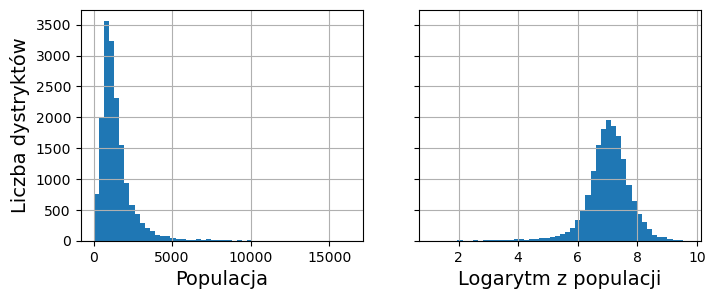

In [53]:
# sprawdzamy i poprawiamy "gruboogonowość"

# logarytm
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)
x_train["population"].hist(ax=axs[0], bins=50)
x_train["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Populacja")
axs[1].set_xlabel("Logarytm z populacji")
axs[0].set_ylabel("Liczba dystryktów")
plt.show()

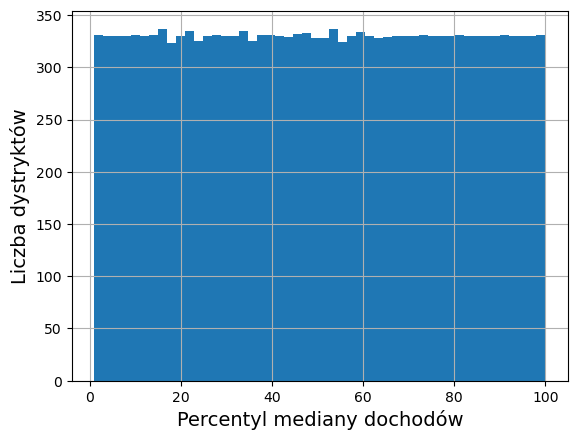

In [54]:
# kubełkowanie (bucketizing / binning)

percentiles = [np.percentile(x_train["median_income"], p)
               for p in range(1, 100)]
x_train["median_income_percentile"] = pd.cut(x_train["median_income"],
                                             bins=[-np.inf] + percentiles + [np.inf],
                                             labels=range(1, 100 + 1))
x_train["median_income_percentile"] = x_train["median_income_percentile"].astype(int)
x_train["median_income_percentile"].hist(bins=50)
plt.xlabel("Percentyl mediany dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [55]:
x_train.drop("median_income_percentile", axis=1, inplace=True)

<Axes: >

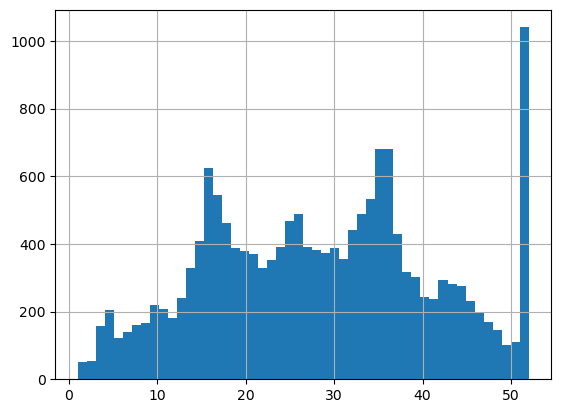

In [56]:
x_train["housing_median_age"].hist(bins=50)

In [57]:
# przekształcanie z wykorzystaniem radialnej funkcji bazowej
# (z wykorzystaniem mody 35 - najczęściej występującej wartości(?), można też użyć kilku różnych)
# można wybrać różne wartości gamma

from sklearn.metrics.pairwise import rbf_kernel

x_train["age_simil_35_v1"] = rbf_kernel(x_train[["housing_median_age"]], [[35]], gamma=0.1)
x_train["age_simil_35_v2"] = rbf_kernel(x_train[["housing_median_age"]], [[35]], gamma=0.03)

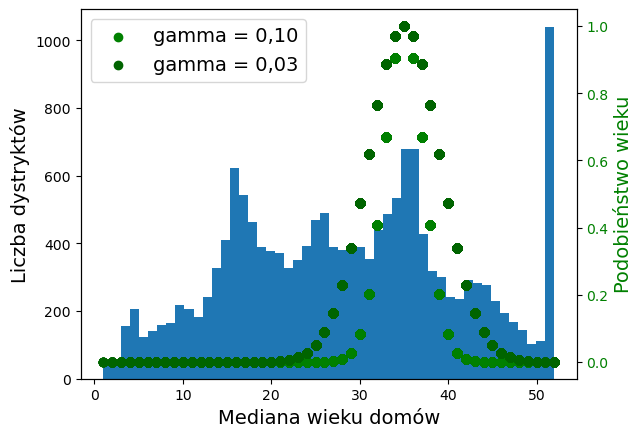

In [58]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Mediana wieku domów")
ax1.set_ylabel("Liczba dystryktów")
ax1.hist(x_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()
ax2.scatter(x_train["housing_median_age"], x_train["age_simil_35_v1"], color="green", label="gamma = 0,10")
ax2.scatter(x_train["housing_median_age"], x_train["age_simil_35_v2"], color="darkgreen", label="gamma = 0,03")
ax2.tick_params(axis="y", labelcolor="green")
ax2.set_ylabel("Podobieństwo wieku", color="green")
plt.legend(loc="upper left")
plt.show()

In [59]:
x_train.drop(["age_simil_35_v1", "age_simil_35_v2"], axis=1, inplace=True)

In [60]:
# przywracanie zakresu wartości do tych sprzed transformacji

from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y_train.to_frame())

model = LinearRegression()
model.fit(x_train[["median_income"]], scaled_labels)
some_new_data = x_train[["median_income"]].iloc[:5] # udajemy, że to są nowe dane

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [61]:
# to samo inaczej

from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(x_train[["median_income"]], y_train)
predictions = model.predict(some_new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [62]:
# niestandardowe transformatory

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(x_train[["population"]])

log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [63]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(x_train[["housing_median_age"]])

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [64]:
# podobieństwo położenia geograficznego do San Fracisco

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

sf_simil

array([[0.99566482],
       [0.99567518],
       [0.99655196],
       ...,
       [0.6599801 ],
       [0.6752005 ],
       [0.67616077]])

In [67]:
# łączenie cech

sample_array = np.array([[1., 2.], [3., 4.]])
sample_array

ratio_trasformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_trasformer.transform(sample_array)

array([[0.5 ],
       [0.75]])

In [68]:
# cluster similarity
# uczymy się najpopularniejszych skupień geograficznych (?) i na tej podstawie robimy nowe parametry podobieńśtwa geograficznego

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [70]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma = 1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Podobieństwo {i} skupienia" for i in range(self.n_clusters)]

In [71]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(
    x_train[["latitude", "longitude"]],
    sample_weight=y_train
)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

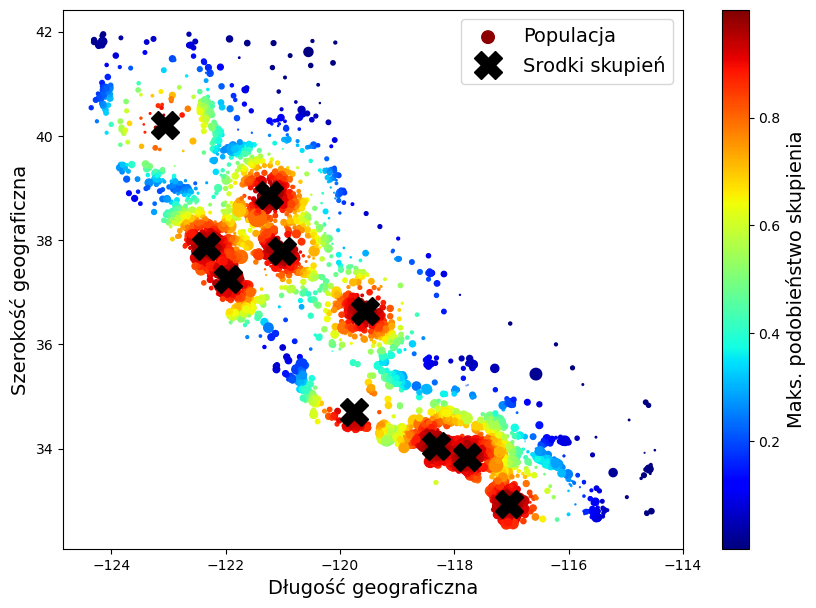

In [75]:
X_train_renamed = x_train.rename(columns={
    "latitude": "Szerokość geograficzna",
    "longitude": "Długość geograficzna",
    "population": "Populacja",
    "median_house_value": "Mediana wartości domu (USD)"
})
X_train_renamed["Maks. podobieństwo skupienia"] = similarities.max(axis=1)

X_train_renamed.plot(
                    kind="scatter",
                     x="Długość geograficzna",
                     y="Szerokość geograficzna",
                     s=X_train_renamed["Populacja"] / 100,
                     label="Populacja",
                     c="Maks. podobieństwo skupienia",
                     cmap="jet",
                     colorbar="true",
                     legend=True,
                     sharex=False,
                     figsize=(10, 7)
                     )

plt.plot(
    cluster_simil.kmeans_.cluster_centers_[:, 1],
    cluster_simil.kmeans_.cluster_centers_[:, 0],
    linestyle="",
    color="black",
    marker="X",
    markersize=20,
    label="Srodki skupień"
    )

plt.legend(loc="upper right")

plt.show()

In [ ]:
# doczytać rozdział i kolejny